In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Import MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Show dataset dimension

In [3]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


Show some images in the dataset and their label

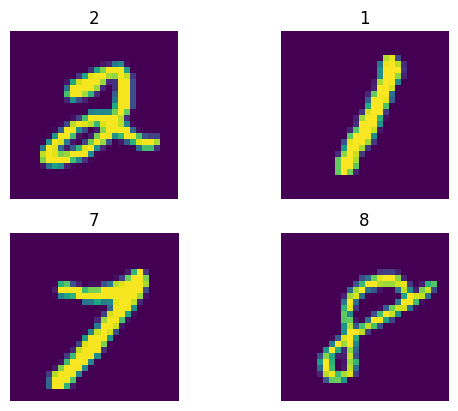

In [4]:
plt.subplot(2,2,1)
plt.imshow(x_train[5])
plt.title(y_train[5])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(x_train[345])
plt.title(y_train[345])
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(x_train[15983])
plt.title(y_train[15983])
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(x_train[59999])
plt.title(y_train[59999])
plt.axis("off")
plt.show()

Get only images from dataset that only represent digits "0" and "1"

In [5]:
# using a mask only some samples are kept
mask = np.logical_or(y_train==0, y_train==1)
print(mask)
x_train = x_train[mask]
y_train = y_train[mask]
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

[False  True False ... False False False]
x_train shape:  (12665, 28, 28)
y_train shape:  (12665,)


In [6]:
# using a mask only some samples are kept
mask = np.logical_or(y_test==0, y_test==1)
print(mask)
x_test = x_test[mask]   # data TEST
y_test = y_test[mask]   # label TEST
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

[False False  True ... False False False]
x_test shape:  (2115, 28, 28)
y_test shape:  (2115,)


In [7]:
# NOT EXECUTED SINCE OUR NETWORK ALREADY HAS A FLATTEN LAYER

#x_train = x_train.reshape((12665, 784))
#x_test = x_test.reshape((2115, 784))


Let's divide our dataset in a training and validation part

In [8]:
x_t = x_train[:int(0.8*x_train.shape[0]),:]     # data TRAIN
y_t = y_train[:int(0.8*y_train.shape[0])]       # label TRAIN
x_val = x_train[int(0.8*x_train.shape[0]):,:]   # data VALIDATION
y_val = y_train[int(0.8*y_train.shape[0]):]     # label VALIDATION

print('x_train shape: ', x_t.shape)
print('y_train shape: ', y_t.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)

x_train shape:  (10132, 28, 28)
y_train shape:  (10132,)
x_val shape:  (2533, 28, 28)
y_val shape:  (2533,)


Normalize input images between 0 and 1

In [9]:
x_t = x_t / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

Create model

In [10]:
# Keras model 1
model1 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(1, input_shape=(784,), activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [12]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
 loss= tf.keras.losses.BinaryCrossentropy(),
 metrics=['accuracy'])
history1 = model1.fit(x_t, y_t, validation_data=(x_val, y_val), epochs=1)

317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8506 - loss: 0.3816 - val_accuracy: 0.9905 - val_loss: 0.0750


Visualize trained weights as an image


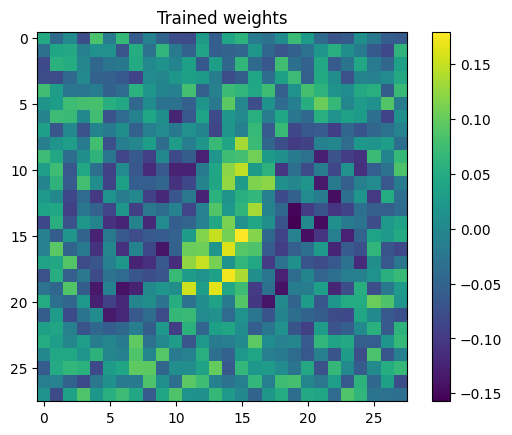

In [13]:
#print(model1.trainable_variables)
print("Visualize trained weights as an image")
w = np.array(model1.trainable_variables[0]).reshape((28,28))    # trained weights

plt.imshow(w)
plt.title("Trained weights")
plt.colorbar()
plt.show()

Evaluate performances on test set

In [14]:
model1.evaluate(x_test, y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0749


[0.067769356071949, 0.9981087446212769]

Evaluate output of the model [value from 0 to 1] and real label on some test images

In [15]:
predictions1 = np.around(np.asarray(model1(x_test)), 3)
print(predictions1[0], y_test[0])
print(predictions1[1], y_test[1])
print(predictions1[2], y_test[2])
print(predictions1[3], y_test[3])
print(predictions1[4], y_test[4])

[0.892] 1
[0.037] 0
[0.955] 1
[0.019] 0
[0.023] 0


Show misclassified images

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


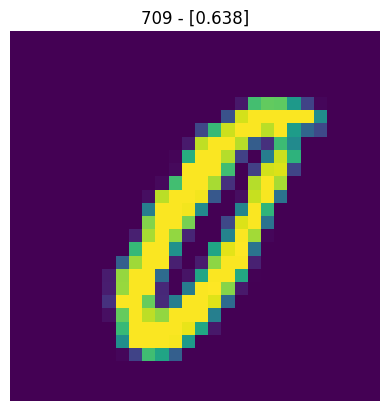

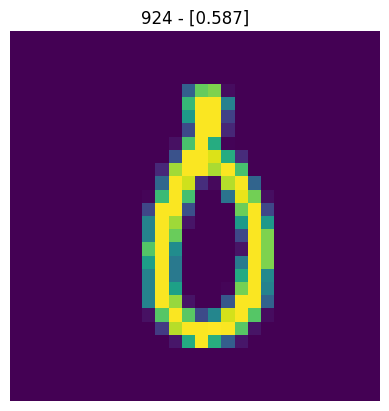

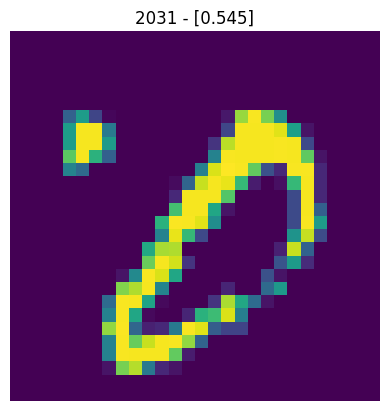

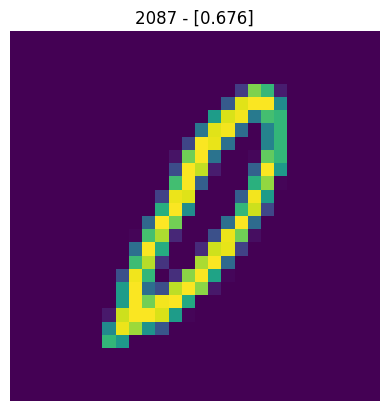

correct:  2111
errors:  4
accuracy:  0.9981087470449173


In [16]:
predictions1_round = np.around(predictions1, 0)
print(predictions1_round)

count_errors = 0
for i in range(len(predictions1_round)):
  if predictions1_round[i]!=y_test[i]:
    count_errors+=1
    plt.imshow(x_test[i])
    plt.title(str(i) + " - " + str(predictions1[i]))
    plt.axis("off")
    plt.show()

accuracy = (len(predictions1)-count_errors)/len(predictions1)
print("correct: ", len(predictions1)-count_errors)
print("errors: ", count_errors)
print("accuracy: ", accuracy)


Try to classify digits that are not 0 or 1 with the trained model

In [17]:
(_, _), (x_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()
x_test_full =  x_test_full / 255.0

predictions_full = model1(x_test_full)
print(predictions_full)

tf.Tensor(
[[0.49524292]
 [0.6016658 ]
 [0.8921431 ]
 ...
 [0.6014447 ]
 [0.62508726]
 [0.08612078]], shape=(10000, 1), dtype=float32)


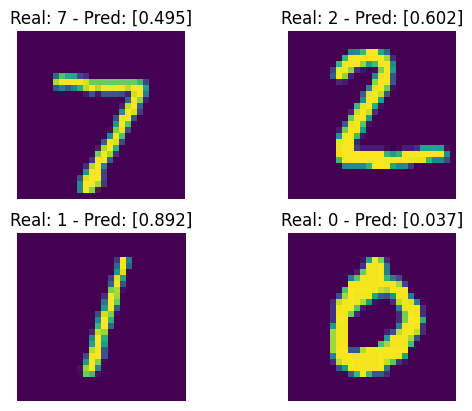

In [18]:
plt.subplot(2,2,1)
plt.imshow(x_test_full[0])
plt.title(f"Real: {y_test_full[0]} - Pred: {np.around(predictions_full[0],3)}")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(x_test_full[1])
plt.title(f"Real: {y_test_full[1]} - Pred: {np.around(predictions_full[1],3)}")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(x_test_full[2])
plt.title(f"Real: {y_test_full[2]} - Pred: {np.around(predictions_full[2],3)}")
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(x_test_full[3])
plt.title(f"Real: {y_test_full[3]} - Pred: {np.around(predictions_full[3],3)}")
plt.axis("off")
plt.show()